### 1. 목표설정
- 보스턴 집 데이터를 바탕으로 주택가격을 예측해보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. 데이터 수집
- 학습용 보스턴 집값 데이터 로드

In [2]:
# 사이킷런에서 지원하는 학습용 보스턴 집 값 데이터셋 임포트
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
# data : 문제 데이터
# target : 정답 데이터
# feature_names : 컬럼(특성)명
# DESCR : 데이터 설명
# filename : 파일명 및 경로

In [7]:
boston['data'].shape

(506, 13)

In [8]:
boston['target'].shape

(506,)

In [9]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

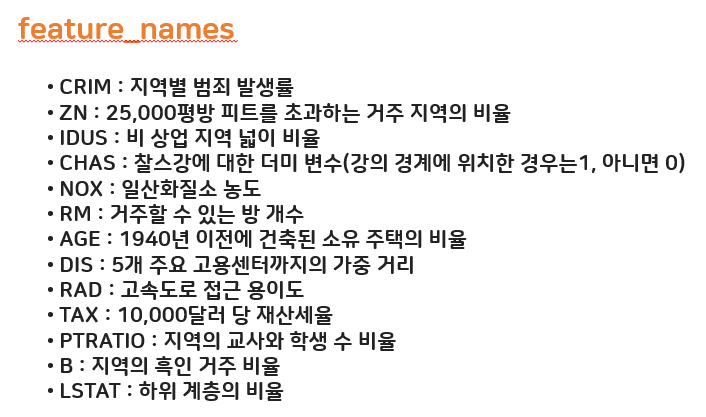

### 3. 데이터 전처리
- 필요없음

### 4. 탐색적 데이터 분석
- 생략

### 5. 모델링(모델선택, 학습, 평가)
- 선형회귀 모델 사용
- 문제, 정답 데이터 설정
- 학습, 평가 데이터 설정

In [10]:
# 문제 데이터 데이터프레임화
dfX = pd.DataFrame(boston['data'],
                   columns=boston['feature_names']
                  )
dfX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
# 정답 데이터 데이터프레임화
dfY = pd.DataFrame(boston['target'],
                   columns=['price']
                  )
dfY

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [12]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [13]:
dfY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [14]:
# 특성별 상관관계 파악
dfX.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


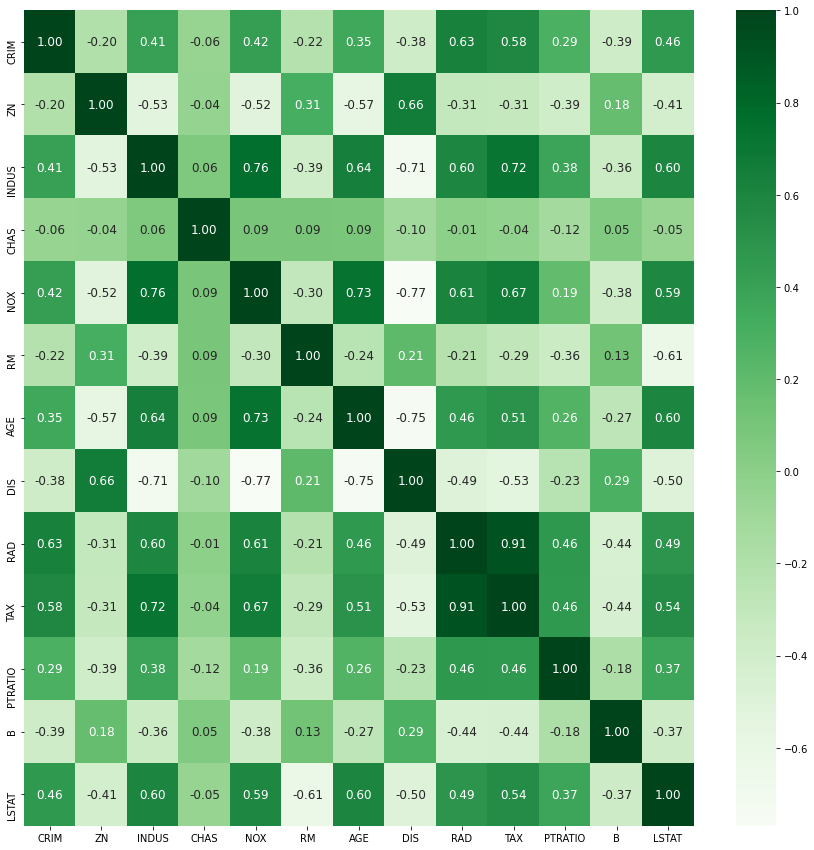

In [15]:
# 상관계수 히트맵 출력
plt.figure(figsize=(15,15))

sns.heatmap(data=dfX.corr(),
            annot=True,                  # annotation : 각 셀 수치값 표시
            annot_kws={'size':12},        # 수치 사이즈 설정
            fmt ='.2f',                   # 수치값 소수 2째 자리까지 표시
            cmap='Greens'                 # 히트맵 색상 설정
           );

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY,
                                                    test_size=0.3,
                                                    random_state=5
                                                   )

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


#### 선형회귀 모델 적용

In [19]:
# 선형회귀 모델 임포트
from sklearn.linear_model import LinearRegression
# 평균제곱오차(MSE) 평가지표 임포트
from sklearn.metrics import mean_squared_error

In [20]:
# 선형회귀 모델은 하이퍼파라미터가 없음
linear_model = LinearRegression()

In [21]:
# 모델 학습
linear_model.fit(X_train, y_train)

LinearRegression()

In [22]:
X_train.shape

(354, 13)

In [23]:
# 특성의 개수(13개)만큼 w값이 출력
# y = w1x1 + w2x2 + ... + w12x12 + w13x13 +b
linear_model.coef_

array([[-1.54486040e-01,  4.13948217e-02, -2.53765225e-02,
         7.86055259e-01, -1.29365836e+01,  4.03952301e+00,
        -1.05354914e-02, -1.33498644e+00,  3.18272501e-01,
        -1.26427463e-02, -9.77287564e-01,  1.26714702e-02,
        -4.62052176e-01]])

In [24]:
# b값은 상수이기 때문에 하나
linear_model.intercept_

array([31.7303513])

In [25]:
# 정답 예측
pre_train = linear_model.predict(X_train)
pre_test = linear_model.predict(X_test)

In [26]:
pre_train

array([[11.43089977],
       [13.71853538],
       [26.41859051],
       [31.68658809],
       [11.05108925],
       [24.77287039],
       [28.95313551],
       [32.22587554],
       [15.6177651 ],
       [30.38543468],
       [ 9.99826193],
       [34.64053591],
       [25.63945823],
       [20.24323288],
       [15.54144862],
       [13.0360023 ],
       [30.45219023],
       [13.26584372],
       [24.4609007 ],
       [20.5425272 ],
       [13.6812139 ],
       [21.84987198],
       [14.10663647],
       [18.62709845],
       [22.16843572],
       [33.47913738],
       [22.3937664 ],
       [16.71951872],
       [30.89456978],
       [38.60764037],
       [26.50840182],
       [25.96896355],
       [15.17045057],
       [15.84735641],
       [35.92045455],
       [22.7882874 ],
       [33.55299704],
       [25.26574698],
       [20.88235588],
       [17.13362298],
       [23.490643  ],
       [19.85788008],
       [30.32364534],
       [16.46744125],
       [25.52727638],
       [26

In [27]:
y_train

,price
445,11.8
428,11.0
481,23.7
55,35.4
488,15.2
...,...
486,19.1
189,34.9
495,23.1
206,24.4


#### 모델 평가
- MSE, RMSE 확인

In [28]:
# MSE ; 평균제곱오차
train_mse = mean_squared_error(pre_train, y_train)
test_mse = mean_squared_error(pre_test, y_test)

# MSE 확인
print('train 데이터 MSE:' , train_mse)
print('test 데이터 MSE:' , test_mse)
print('train, test의 MSE 차이:', test_mse - train_mse)

print('='*45)

# RMSE 확인(MSE에 0.5제곱 해주기)
print('train 데이터 RMSE:' , train_mse**0.5)
print('test 데이터 RMSE:' , test_mse**0.5)
print('train, test의 RMSE 차이:', test_mse**0.5 - train_mse**0.5)

train 데이터 MSE: 19.068341850927226
test 데이터 MSE: 30.69703770408852
train, test의 MSE 차이: 11.628695853161293
train 데이터 RMSE: 4.366731254717563
test 데이터 RMSE: 5.540490745781327
train, test의 RMSE 차이: 1.1737594910637634


In [29]:
# 정답 데이터(집 가격)의 평균수치를 확인해보자!
print('train데이터 주택가격 평균:', y_train['price'].mean())
print('train데이터 주택가격 평균:', y_test['price'].mean())

train데이터 주택가격 평균: 22.556214689265538
train데이터 주택가격 평균: 22.478289473684214


#### train 데이터의 경우 평균 집값 22.5만 달러에서 오차인 RMSE는 4.3만 달러 정도정도네!

- R2 스코어 확인

In [30]:
# train 데이터의 R2스코어
linear_model.score(X_train, y_train)

0.7611598772034454

In [31]:
# test 데이터의 R2스코어
linear_model.score(X_test, y_test)

0.67716969998517

- R2 스코어 값이 애매해서 좀 더 올려보자!

### 선형회귀 모델 특성확장
- 데이터 전체의 특성을 더 늘려보자!
- 선형회귀는 특성이 적으면(모델이 간단하면) 성능이 낮게 나옴(하이퍼파라미터 조정이 불가능하기 때문)
- 각 특성들의 데이터를 곱하여 새로운 특성으로 만들어보자!

In [32]:
# copy : 기존의 데이터는 그대로 두면서 새로운 변수명에 값을 넣어 줌
# copy 없이 X_train을 새 변수에 담아주면 변수의 내용이 바뀌면 X_train도 같이 바뀜
extended_X_train = X_train.copy()

In [33]:
a = [1,2,3]
b = a

In [34]:
b[0] = 0
b

[0, 2, 3]

In [35]:
a

[0, 2, 3]

In [36]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [37]:
# X_train의 각 컬럼들 서로서로 한번씩 곱해서 새로운 컬럼으로 추가시켜주자!
for col1 in X_train.columns :      # 13번 반복
    for col2 in X_train.columns :  # 13번 반복
        # 새로운 컬럼을 만들어서 데이터프레임에 계속 추가해주기!(곱해서 추가)
        extended_X_train[col1 + 'x' + col2] = X_train[col1] * X_train[col2]

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
extended_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIMxCRIM,CRIMxZN,CRIMxINDUS,CRIMxCHAS,CRIMxNOX,CRIMxRM,CRIMxAGE,CRIMxDIS,CRIMxRAD,CRIMxTAX,CRIMxPTRATIO,CRIMxB,CRIMxLSTAT,ZNxCRIM,ZNxZN,ZNxINDUS,ZNxCHAS,ZNxNOX,ZNxRM,ZNxAGE,ZNxDIS,ZNxRAD,ZNxTAX,ZNxPTRATIO,ZNxB,ZNxLSTAT,INDUSxCRIM,INDUSxZN,INDUSxINDUS,INDUSxCHAS,INDUSxNOX,INDUSxRM,INDUSxAGE,INDUSxDIS,INDUSxRAD,INDUSxTAX,INDUSxPTRATIO,INDUSxB,INDUSxLSTAT,CHASxCRIM,CHASxZN,CHASxINDUS,CHASxCHAS,CHASxNOX,CHASxRM,CHASxAGE,CHASxDIS,CHASxRAD,CHASxTAX,CHASxPTRATIO,CHASxB,CHASxLSTAT,NOXxCRIM,NOXxZN,NOXxINDUS,NOXxCHAS,NOXxNOX,NOXxRM,NOXxAGE,NOXxDIS,NOXxRAD,NOXxTAX,NOXxPTRATIO,NOXxB,NOXxLSTAT,RMxCRIM,RMxZN,RMxINDUS,RMxCHAS,RMxNOX,RMxRM,RMxAGE,RMxDIS,RMxRAD,RMxTAX,RMxPTRATIO,RMxB,RMxLSTAT,AGExCRIM,AGExZN,AGExINDUS,AGExCHAS,AGExNOX,AGExRM,AGExAGE,AGExDIS,AGExRAD,AGExTAX,AGExPTRATIO,AGExB,AGExLSTAT,DISxCRIM,DISxZN,DISxINDUS,DISxCHAS,DISxNOX,DISxRM,DISxAGE,DISxDIS,DISxRAD,DISxTAX,DISxPTRATIO,DISxB,DISxLSTAT,RADxCRIM,RADxZN,RADxINDUS,RADxCHAS,RADxNOX,RADxRM,RADxAGE,RADxDIS,RADxRAD,RADxTAX,RADxPTRATIO,RADxB,RADxLSTAT,TAXxCRIM,TAXxZN,TAXxINDUS,TAXxCHAS,TAXxNOX,TAXxRM,TAXxAGE,TAXxDIS,TAXxRAD,TAXxTAX,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxCRIM,PTRATIOxZN,PTRATIOxINDUS,PTRATIOxCHAS,PTRATIOxNOX,PTRATIOxRM,PTRATIOxAGE,PTRATIOxDIS,PTRATIOxRAD,PTRATIOxTAX,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxCRIM,BxZN,BxINDUS,BxCHAS,BxNOX,BxRM,BxAGE,BxDIS,BxRAD,BxTAX,BxPTRATIO,BxB,BxLSTAT,LSTATxCRIM,LSTATxZN,LSTATxINDUS,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98,113.887315,0.0000,193.159580,0.0,7.897132,68.929156,1011.686640,21.214471,256.12320,7107.41880,215.570360,459.527708,255.909764,0.0000,0.0,0.0,0.0,0.000,0.000,0.0,0.0000,0.0,0.0,0.0,0.0,0.00,193.159580,0.0,327.6100,0.0,13.39400,116.90790,1715.880,35.980990,434.40,12054.60,365.620,779.3860,434.0380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.897132,0.000,13.39400,0.0,0.547600,4.779660,70.1520,1.471046,17.760,492.840,14.9480,31.86440,17.74520,68.929156,0.000,116.90790,0.0,4.779660,41.718681,612.3132,12.839846,155.016,4301.694,130.4718,278.12454,154.88682,1011.686640,0.0,1715.880,0.0,70.1520,612.3132,8987.04,188.45292,2275.2,63136.8,1914.96,4082.088,2273.304,21.214471,0.0000,35.980990,0.0,1.471046,12.839846,188.45292,3.951746,47.7096,1323.9414,40.15558,85.598974,47.669842,256.12320,0.0,434.40,0.0,17.760,155.016,2275.2,47.7096,576.0,15984.0,484.8,1033.44,575.52,7107.41880,0.0,12054.60,0.0,492.840,4301.694,63136.8,1323.9414,15984.0,443556.0,13453.2,28677.96,15970.68,215.570360,0.0,365.620,0.0,14.9480,130.4718,1914.96,40.15558,484.8,13453.2,408.04,869.812,484.396,459.527708,0.0,779.3860,0.0,31.86440,278.12454,4082.088,85.598974,1033.44,28677.96,869.812,1854.1636,1032.5788,255.909764,0.00,434.0380,0.0,17.74520,154.88682,2273.304,47.669842,575.52,15970.68,484.396,1032.5788,575.0404
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52,54.274310,0.0000,133.344691,0.0,5.002268,45.624512,575.371291,14.259778,176.81064,4906.49526,148.815622,712.620550,158.540207,0.0000,0.0,0.0,0.0,0.000,0.000,0.0,0.0000,0.0,0.0,0.0,0.0,0.00,133.344691,0.0,327.6100,0.0,12.28990,112.09330,1413.610,35.034360,434.40,12054.60,365.620,1750.8130,389.5120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.002268,0.000,12.28990,0.0,0.461041,4.205047,53.0299,1.314272,16.296,452.214,13.7158,65.67967,14.61208,45.624512,0.000,112.09330,0.0,4.205047,38.353249,483.6733,11.987171,148.632,4124.538,125.0986,599.04889,133.27336,575.371291,0.0,1413.610,0.0,53.0299,483.6733,6099.61,151.17036,1874.4,52014.6,1577.62,7554.613,1680.712,14.259778,0.0000,35.034360,0.0,1.314272,11.987171,151.17036,3.746547,46.4544,1289.1096,39.09912,187.230588,41.654112,176.81064,0.0,434.40,0.0,16.296,148.632,1874.4,46.4544,576.0,15984.0,484.8,2321.52,516.48,4906.49526,0.0,12054.60,0.0,452.214,4124.538,52014.6,1289.1096,15984.0,443556.0,13453.2,6442

In [40]:
extended_X_train.shape

(354, 182)

In [41]:
# test
extended_X_test = X_test.copy()

In [42]:
# X_test의 각 컬럼들 서로서로 한번씩 곱해서 새로운 컬럼으로 추가시켜주자!
for col1 in X_test.columns :      # 13번 반복
    for col2 in X_test.columns :  # 13번 반복
        # 새로운 컬럼을 만들어서 데이터프레임에 계속 추가해주기!(곱해서 추가)
        extended_X_test[col1 + 'x' + col2] = X_test[col1] * X_test[col2]

In [43]:
extended_X_test.shape

(152, 182)

In [44]:
# 특성확장된 train데이터의 문제와 정답데이터로 학습
linear_model2 = LinearRegression()
linear_model2.fit(extended_X_train, y_train)

LinearRegression()

In [45]:
# 특성 확장된 문제 데이터로 정답 예측
ex_pre_train = linear_model2.predict(extended_X_train)
ex_pre_test = linear_model2.predict(extended_X_test)

In [46]:
# 특성 확장후 MSE, RMSE
ex_train_mse = mean_squared_error(ex_pre_train, y_train)
ex_test_mse = mean_squared_error(ex_pre_test, y_test)

# MSE 확인
print('train 데이터 MSE:' , ex_train_mse)
print('test 데이터 MSE:' , ex_test_mse)
print('train, test의 MSE 차이:', ex_test_mse - ex_train_mse)

print('='*45)

# RMSE 확인(MSE에 0.5제곱 해주기)
print('train 데이터 RMSE:' , ex_train_mse**0.5)
print('test 데이터 RMSE:' , ex_test_mse**0.5)
print('train, test의 RMSE 차이:', ex_test_mse**0.5 - ex_train_mse**0.5)

train 데이터 MSE: 5.329363416561545
test 데이터 MSE: 18.12803010569276
train, test의 MSE 차이: 12.798666689131213
train 데이터 RMSE: 2.3085414045586328
test 데이터 RMSE: 4.257702444475513
train, test의 RMSE 차이: 1.9491610399168806


In [47]:
linear_model2.score(extended_X_train, y_train)

0.9332471683804467

In [48]:
linear_model2.score(extended_X_test, y_test)

0.8093536759438125

- 특성확장(복잡도↑)을 했더니 결과가 훨씬 좋게 나오는 것을 확인할 수 있음

- '+'로 특성확장

In [49]:
ex_X_train = X_train.copy()
ex_X_test = X_test.copy()

In [50]:
for col1 in X_train.columns :      # 13번 반복
    for col2 in X_train.columns :  # 13번 반복
        # 새로운 컬럼을 만들어서 데이터프레임에 계속 추가해주기!(곱해서 추가)
        ex_X_train[col1 + '+' + col2] = X_train[col1] + X_train[col2]

In [51]:
for col1 in X_test.columns :      # 13번 반복
    for col2 in X_test.columns :  # 13번 반복
        # 새로운 컬럼을 만들어서 데이터프레임에 계속 추가해주기!(곱해서 추가)
        ex_X_test[col1 + '+' + col2] = X_test[col1] + X_test[col2]

In [52]:
linear_model3 = LinearRegression()
linear_model3.fit(ex_X_train, y_train)   # +로 확장된 X_train 데이터를 넣어줌

LinearRegression()

In [53]:
linear_model3.score(ex_X_train, y_train)

0.7612235653337154

In [54]:
linear_model3.score(ex_X_test, y_test)

0.6769666863465591

### 규제 모델을 적용해보자!

#### 라쏘(Lasso) 모델 적용

In [55]:
# 경고메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.linear_model import Lasso

In [57]:
# alpha 값으로 규제의 강도를 설정 가능
# alpha 값이 높아지면 규제의 강도가 쎄지고 과대적합의 위험성이 줄어듦
lasso_model = Lasso(alpha = 10)

In [58]:
lasso_model.fit(extended_X_train, y_train)

Lasso(alpha=10)

In [59]:
lasso_model.coef_

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.94667826e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -4.44205320e-04, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.47061590e-04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.59533024e-05, -0.00000000e+00, -0.00000000e+00,  2.11915465e-04,
        0.00000000e+00, -2.68432101e-04, -5.72134739e-04,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.61713113e-05, -0.00000000e+00, -2.61900902e-04, -0.00000000e+00,
        0.00000000e+00,  

In [60]:
# 라쏘는 필요없는 특성의 w값을 0으로 만들어주기 때문에 0이 아닌 w값들의 개수를
# 구하면 학습에 사용된 특성이 몇 개인지 확인할 수 있음
print(f"사용한 특성의 수 : {np.sum(lasso_model.coef_!=0)}")

사용한 특성의 수 : 49


In [61]:
pre_train_lasso = lasso_model.predict(extended_X_train)
pre_test_lasso = lasso_model.predict(extended_X_test)

In [62]:
# 특성 확장후 MSE, RMSE
train_mse_la = mean_squared_error(pre_train_lasso, y_train)
test_mse_la = mean_squared_error(pre_test_lasso, y_test)

# MSE 확인
print('train 데이터 MSE:' , train_mse_la)
print('test 데이터 MSE:' , test_mse_la)
print('train, test의 MSE 차이:', test_mse_la - train_mse_la)

print('='*45)

# RMSE 확인(MSE에 0.5제곱 해주기)
print('train 데이터 RMSE:' , train_mse_la**0.5)
print('test 데이터 RMSE:' , test_mse_la**0.5)
print('train, test의 RMSE 차이:', test_mse_la**0.5 - train_mse_la**0.5)

train 데이터 MSE: 11.772124825717558
test 데이터 MSE: 17.91779281740544
train, test의 MSE 차이: 6.145667991687883
train 데이터 RMSE: 3.4310530199513907
test 데이터 RMSE: 4.232941390735931
train, test의 RMSE 차이: 0.8018883707845403


In [63]:
lasso_model.score(extended_X_train, y_train)  # 93 -> 85

0.8525484931552121

In [64]:
lasso_model.score(extended_X_test, y_test)    # 80 -> 81

0.8115646699656578

- 선형회귀 모델에 비해서 train데이터의 오차는 약간 늘어났지만 과대적합이 줄어든것을 확인할 수 있음

#### 릿지(Ridge) 모델 적용

In [65]:
from sklearn.linear_model import Ridge

In [66]:
ridge_model = Ridge(alpha=10)

In [67]:
ridge_model.fit(extended_X_train, y_train)

Ridge(alpha=10)

In [68]:
pre_train_ridge = ridge_model.predict(extended_X_train)
pre_test_ridge = ridge_model.predict(extended_X_test)

In [69]:
# 특성 확장후 MSE, RMSE
train_mse_ri = mean_squared_error(pre_train_ridge, y_train)
test_mse_ri = mean_squared_error(pre_test_ridge, y_test)

# MSE 확인
print('train 데이터 MSE:' , train_mse_ri)
print('test 데이터 MSE:' , test_mse_ri)
print('train, test의 MSE 차이:', test_mse_ri - train_mse_ri)

print('='*45)

# RMSE 확인(MSE에 0.5제곱 해주기)
print('train 데이터 RMSE:' , train_mse_ri**0.5)
print('test 데이터 RMSE:' , test_mse_ri**0.5)
print('train, test의 RMSE 차이:', test_mse_ri**0.5 - train_mse_ri**0.5)

train 데이터 MSE: 6.430744469502569
test 데이터 MSE: 15.363594941038443
train, test의 MSE 차이: 8.932850471535874
train 데이터 RMSE: 2.5358912574285535
test 데이터 RMSE: 3.919642195537552
train, test의 RMSE 차이: 1.3837509381089985


In [70]:
ridge_model.score(extended_X_train, y_train)

0.9194518427046885

In [71]:
ridge_model.score(extended_X_test, y_test)

0.8384262998946909

- alpha값이 10일때, 릿지모델에 비해서 라쏘모델이 과대적합 해소에 더 유리함

### 하이퍼파라미터 튜닝
- alpha값을 바꿔가며 RMSE를 확인해보자!

In [72]:
# Lasso 모델
# alpha 값에 따라 RMSE 계산값을 빈 리스트에 하나씩 담아보자!
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]
lasso_train_list = []    # train의 RMSE 값을 넣어줄 빈 리스트
lasso_test_list = []     # test의 RMSE 값을 넣어줄 빈 리스트

for i in alpha_list :
    # 모델 불러오기
    lasso_model = Lasso(alpha=i)
    # 모델 학습
    lasso_model.fit(extended_X_train, y_train)
    
    # 학습된 모델로 train 데이터 예측
    lasso_train_pre = lasso_model.predict(extended_X_train)
    # RMSE 값 계산
    lasso_train_RMSE = mean_squared_error(lasso_train_pre, y_train)**0.5
    # 비어있는 리스트에 RMSE값 넣기
    lasso_train_list.append(lasso_train_RMSE)
    
    # 학습된 모델로 test 데이터 예측
    lasso_test_pre = lasso_model.predict(extended_X_test)
    # RMSE 값 계산
    lasso_test_RMSE = mean_squared_error(lasso_test_pre, y_test)**0.5
    # 비어있는 리스트에 RMSE값 넣기
    lasso_test_list.append(lasso_test_RMSE)

In [73]:
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

In [74]:
alpha_list

[0.001, 0.01, 0.1, 10, 100, 1000]

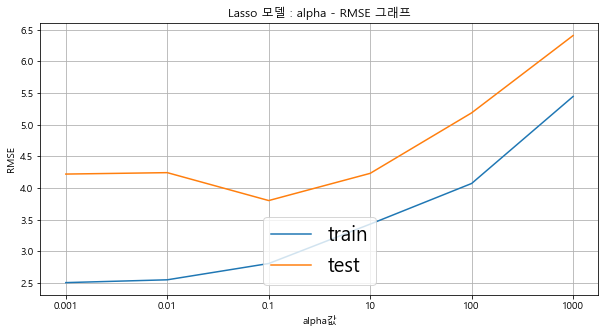

In [75]:
# Lasso 모델의 train, test에 대한 RMSE 값을 그래프로 표현
plt.figure(figsize=(10,5))
plt.plot(lasso_train_list, label ='train')    # train 그래프
plt.plot(lasso_test_list, label ='test')      # test 그래프
plt.title("Lasso 모델 : alpha - RMSE 그래프")  # 그래프 제목
plt.xlabel('alpha값')                          # x축 라벨
plt.xticks(np.arange(6), alpha_list)           # x축 값 설정(개수, 실제값)
plt.ylabel('RMSE')                             # y축 라벨
plt.legend(prop={'size':20}, loc='lower center')
plt.grid()
plt.show()

In [76]:
# Ridge 모델
# alpha 값에 따라 RMSE 계산값을 빈 리스트에 하나씩 담아보자!
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]
ridge_train_list = []    # train의 RMSE 값을 넣어줄 빈 리스트
ridge_test_list = []     # test의 RMSE 값을 넣어줄 빈 리스트

for i in alpha_list :
    # 모델 불러오기
    ridge_model = Ridge(alpha=i)
    # 모델 학습
    ridge_model.fit(extended_X_train, y_train)
    
    # 학습된 모델로 train 데이터 예측
    ridge_train_pre = ridge_model.predict(extended_X_train)
    # RMSE 값 계산
    ridge_train_RMSE = mean_squared_error(ridge_train_pre, y_train)**0.5
    # 비어있는 리스트에 RMSE값 넣기
    ridge_train_list.append(ridge_train_RMSE)
    
    # 학습된 모델로 test 데이터 예측
    ridge_test_pre = ridge_model.predict(extended_X_test)
    # RMSE 값 계산
    ridge_test_RMSE = mean_squared_error(ridge_test_pre, y_test)**0.5
    # 비어있는 리스트에 RMSE값 넣기
    ridge_test_list.append(ridge_test_RMSE)

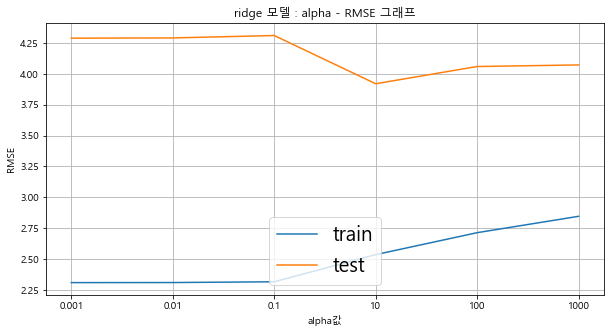

In [77]:
# ridge 모델의 train, test에 대한 RMSE 값을 그래프로 표현
plt.figure(figsize=(10,5))
plt.plot(ridge_train_list, label ='train')    # train 그래프
plt.plot(ridge_test_list, label ='test')      # test 그래프
plt.title("ridge 모델 : alpha - RMSE 그래프")  # 그래프 제목
plt.xlabel('alpha값')                          # x축 라벨
plt.xticks(np.arange(6), alpha_list)           # x축 값 설정(개수, 실제값)
plt.ylabel('RMSE')                             # y축 라벨
plt.legend(prop={'size':20}, loc='lower center')
plt.grid()
plt.show()

#### 보스턴 집 값 데이터에서는 Ridge 모델에 비해 Lasso 모델의 train,test 데이터의 RMSE값의 차이가 적기 때문에 과대적합에 좀 더 유리하다고 볼 수 있음
- Lasso 모델의 경우 alpha 값이 10일때 가장 과대적합에 유리하다고 볼 수 있음